In [1]:
import os
import sys
import glob
import datetime

import matplotlib.pyplot as plt
import numpy as np

from tqdm import tqdm
from scipy.signal import medfilt

In [2]:
files_0531 = sorted(
    glob.glob('./final_dataset/obs_data_real_calib/*'),
    key=lambda x: datetime.datetime.strptime(os.path.basename(x), '%d.%m.%Y_obs_0531+21.csv'))

In [25]:
# установка диапазона дат
date_start = datetime.datetime(2018, 1, 1, 0, 0)
data_stop = datetime.datetime(2018, 3, 30, 0, 0)

main_set = [x for x in files_0531
             if date_start <= datetime.datetime.strptime(os.path.basename(x)[:10], '%d.%m.%Y') <= data_stop]

In [27]:
main_set

['./final_dataset/obs_data_real_calib\\02.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\03.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\06.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\07.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\08.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\09.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\10.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\12.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\13.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\14.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\15.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\16.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\17.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\18.01.2018_obs_0531+21.csv',
 './final_dataset/obs_data_real_calib\\19.01.201

In [ ]:
full_obs = None
for file in main_set:
    flat_obs = np.genfromtxt(file, skip_header=7)
    full_obs = np.hstack([full_obs, flat_obs])

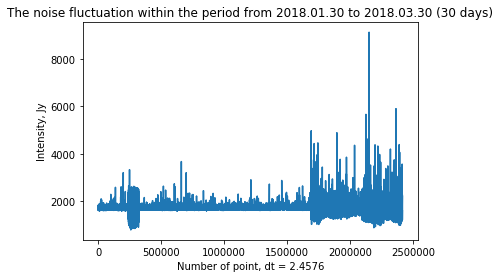

In [22]:
start = date_start.strftime('%Y.%m.%d')
end = data_stop.strftime('%Y.%m.%d')
plt.close()
plt.title(f'The noise fluctuation within the period from {start} to {end} ({len(main_set)} days)')
plt.xlabel('Number of point, dt = 2.4576')
plt.ylabel('Intensity, Jy')
plt.plot(full_obs)
plt.savefig(f'noise_fluctuation_{start}-{end}.png', format='png', dpi=150)

In [11]:
std_list = []
for file in main_set:
    flat_obs = np.genfromtxt(file, skip_header=7)
    std_list.append(np.std(np.extract(flat_obs<=np.median(flat_obs), flat_obs))*2)

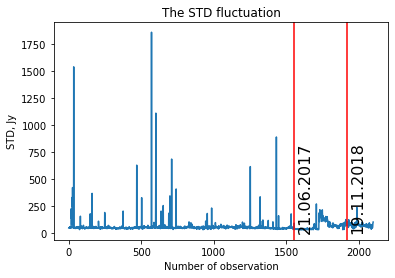

In [12]:
plt.close()
plt.title('The STD fluctuation')
plt.xlabel('Number of observation')
plt.ylabel('STD, Jy')
plt.plot(std_list)
plt.axvline(1921, color='r')
plt.axvline(1554, color='r')
plt.text(1554 + 25, 20, '21.06.2017', fontsize=16, rotation=90)
plt.text(1921 + 25, 20, '19.11.2018', fontsize=16, rotation=90)
plt.savefig('std_fluctuation.png', format='png', dpi=150)

In [66]:
for idx, file in enumerate(main_set):
    if os.path.basename(file)[:10] == '21.06.2017':
        print(idx)
        break
    else:
        continue

1554


0.7050615875588091